# Final  - The Battle of the Neighborhoods (Week 1 & 2)

## Coursera Capstone Project

**Let's upload the libraries we need first**

In [1]:
import numpy as np
import time
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
import requests 
from pandas.io.json import json_normalize 


!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 
import folium 
from folium import plugins

import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

# Content

**1. Introduction:**
  - 1.1 Scenario

  - 1.2 Business Problem

  - 1.3 Interested Audience


**2. Data:**
  - 2.1 Current Residence Data

  - 2.2 Future Residence Data - Required to Resolve Problem

  - 2.3 Data sources and Data Manipulation


**3. Methodology:**
  - Process and Strategy in Problem Resolution
  - Data Science Methods - ML, Mapping, Exploratory Data Analysis


**4. Results:**
  - Discussion of the results and how they help to take a decision


**5. Discussion:**
  - Elaboration and discussion on any observations and/or recommendations for improvement


**6. Conclusion:**
  - Desicison taken and Report Conclusion

## 1. Introduction

### 1.1 Scenario

I have friend who lives in Singapore, she has been offered by her employer to relocate to Manhattan NY. She is very excited about it but she is also hesitant because she loves her current residence in Singapore and doubts she will find a similarly convinient place in NYC.

She lives within walking distance to an MRT metro station, different kinds of restaurants, cafes, shop and many kinds of entertainment.

I am excited for this opportunity to help my friend find a place in NY similar to her place in Singapore now while also applying what I learned in the Coursera Applied Data Science Capstone course.

### 1.2 Business Problem

**To find an apartment in Manhattan NY that meets the following:**

- 2 or 3 bedrooms
- a metro station within a 1.0 mile radius
- rent: USD7,000 per month
- accesible places: coffee shop, asian restaurants, groceries, gym

### 1.3 Interested Audience

Aside from my friend and me, this study may alse be useful to anyone interested in moving to Manhattan NY. It is also a good reference for anyone wanting to practice and develop their Data Science skills

## 2. Data

### 2.1 Current Residence Data

My friend currently resides in downtown Singapore. We use Foursquare to identify the venues around the area which are then shown in the Singapore map shown in methodology section 3.0. We refer to it as a comparison to the desired future residence in Manhattan NY.

### 2.2 Future Residence Data - Required to Resolve Problem

**To find the perfect apartment in Manhattan NY, we need the following data:**

- List of neighborhoods in Manhattan with their Geodata**
- List of subway metro stations in Manhattan with geodata**
- Listed apartments for rent in Manhattan area with descriptions - beds, price, location, address**
- Venues and ammenities in the Manhattan neighborhoods**

### 2.3 Data Sources and Data Manipulation

 - The list of Manhattan neighborhoods is worked out during LAb exercise during the course. A csv file was created which will be read in order to create a dataframe and its mapping.
 - A list of Manhattan subway metro stops was complied in Numbers (excel) and it was complemeted with wikipedia data ( https://en.wikipedia.org/wiki/List_of_New_York_City_Subway_stations_in_Manhattan) and information from NY Transit authority and Google maps (https://www.google.com/maps/search/manhattan+subway+metro+stations/@40.7837297,-74.1033043,11z/data=!3m1!4b1) for a final consolidated list of subway stops names and their address. The geolocation was obtained via an algorythm using Nominatim.
 - A list of places for rent was collected by web-browsing real estate companies in Manhattan : http://www.rentmanhattan.com/index.cfm?page=search&state=results https://www.nestpick.com/search?city=new-york&page=1&order=relevance&district=manhattan&gclid=CjwKCAiAjNjgBRAgEiwAGLlf2hkP3A-cPxjZYkURqQEswQK2jKQEpv_MvKcrIhRWRzNkc_r-fGi0lxoCA7cQAvD_BwE&type=apartment&display=list https://www.realtor.com/apartments/Manhattan_NY A csv file was compiled with the rental place that indicated: areas of Manhattan, address, number of beds, area and monthly rental price. An algorythm was used to create all the geodata using Nominatim. With the use of geolocator = Nominatim() , it was possible to determine the latitude and longiude for the subway metro locations as well as for the geodata for each rental place listed. 
 - Use Foursquare and geopy data to map top 10 venues for all Manhattan neighborhoods clustered in groups. Use foursquare and geopy data to map the location of subway metro stations, separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately. Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations. Create a map that shows, the average rental price per square ft, around a radious of 1.0 mile around each subway station. Addresses from rental locations will be converted to geodata using Geopy-distance and Nominatim. 
- The following maps were created for analysis:
  - Manhattan map of Neighborhoods 
  - Manhattan subway metro locations
  - Manhattan map of places for rent 
  - Manhattan map of clustered venues and neighborhoods 
  - Combined maps of Manhattan rent places with subway locations 
  - Combined maps of Manhattan rent places with subway locations and venues clusters

## 3. Methodology

This section takes up the biggest chunk of our report. This is where we will gather the data, prepare it, analyze it to help us make a logical decision for our bjusiness problem.

**Analysis and Strategy**
Our choice will largely depend on the maps we will create as stated in the Data Section. Using thr maps we will try our best to answer the following questions:

- what is the cost of available rental places that meet the demands?
- what is the cost of rent around a mile radius from each subway metro station?
- what is the area of Manhattan with best rental pricing that meets our requirements?
- what are the venues of the two best places to live? How do the prices compare?
- how venues distribute among Manhattan neighborhoods and around metro stations?
- any other interesting statistical data findings of the real estate and overall data.

### Singapore Map - Venues in Current Neigborhood

In [11]:
address = 'Mccallum Street, Singapore'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore place are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore place are 1.2795465, 103.8476049.


In [12]:
neighborhood_latitude=1.2792655
neighborhood_longitude=103.8480938

In [13]:
# The code was removed by Watson Studio for sharing.

In [14]:
LIMIT = 100 
radius = 500 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=VBBXDVFCTI4QAQ5USY3ID3YEEBEYZKQ0SP4TL3MRZ0V0N1O2&client_secret=V4JSSKC0WZWHNZFLDL4PI5ZFL5VWAQY0FXWW1JKSR1IO2LHZ&v=20200722&ll=1.2792655,103.8480938&radius=500&limit=100'

In [15]:
results = requests.get(url).json()

In [16]:
# let's extract the category of the venues - borrow from foursquare lab
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
SGnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
SGnearby_venues =SGnearby_venues.loc[:, filtered_columns]
# filter the category for each row
SGnearby_venues['venue.categories'] = SGnearby_venues.apply(get_category_type, axis=1)
# clean columns
SGnearby_venues.columns = [col.split(".")[-1] for col in SGnearby_venues.columns]

SGnearby_venues.shape

(100, 4)

In [18]:
# Venues near current Singapore residence
SGnearby_venues.head(10)

,name,categories,lat,lng
0,Napoleon Food & Wine Bar,Wine Bar,1.279925,103.847333
1,Native,Cocktail Bar,1.280135,103.846844
2,Park Bench Deli,Deli / Bodega,1.279872,103.847287
3,Freehouse,Beer Garden,1.281254,103.848513
4,Pepper Bowl,Asian Restaurant,1.279371,103.846710
5,Meat Smith,Southern / Soul Food Restaurant,1.280205,103.847410
6,Anglo Indian Cafe & Bar,Indian Restaurant,1.279084,103.850127
7,Mellower Coffee,Café,1.277814,103.848188
8,PS.Cafe,Café,1.280468,103.846264
9,Lau Pa Sat Satay Street,Street Food Gathering,1.280261,103.850235


**Map of Singapore with venues near residence place**

In [19]:
latitude=1.2792655
longitude=103.8480938
# create map of Singapore place  using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(SGnearby_venues['lat'], SGnearby_venues['lng'], SGnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_sg)  
    
map_sg

### Manhattan Neighborhoods - Data and Maps

We'll download the csv file we previously created during the labs 

In [40]:
body = client_3258318c98374e0390d2a162f2c12e66.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-c9q61ulbzgisc4',Key='mh_neigh_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mh_nh_data = pd.read_csv(body)
mh_nh_data.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,2
1,Manhattan,Chinatown,40.715618,-73.994279,2
2,Manhattan,Washington Heights,40.851903,-73.936900,4
3,Manhattan,Inwood,40.867684,-73.921210,3
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0


In [41]:
mh_nh_data.tail()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
35,Manhattan,Turtle Bay,40.752042,-73.967708,3
36,Manhattan,Tudor City,40.746917,-73.971219,3
37,Manhattan,Stuyvesant Town,40.731000,-73.974052,4
38,Manhattan,Flatiron,40.739673,-73.990947,3
39,Manhattan,Hudson Yards,40.756658,-74.000111,2


### Manhattan Borough neighborhoods - top 10 clustered venues

In [42]:

body = client_3258318c98374e0390d2a162f2c12e66.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-c9q61ulbzgisc4',Key='manhattan_merged.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mh_merged = pd.read_csv(body)
mh_merged.head()


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


### Map of Manhattan Neighborhoods with top 10 clustered venues

We added popus so we can identify each neighborhood and the cluster of venues around so we can examine it in detail

In [46]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558 

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mh_merged['Latitude'], mh_merged['Longitude'], mh_merged['Neighborhood'], mh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(mh_nh_data['Latitude'], mh_nh_data['Longitude'], mh_nh_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

### Examined the Clusters
**After examining the cluster data, we cam to the conclusion cluster # 2 resembles the Singapore residence the closest, we'll use this as guidance to look for the perfect apartment in the area.**

**We Assign a value to 'kk' to explore a given cluster.**

In [49]:
kk = 2
mh_merged.loc[mh_merged['Cluster Labels'] == kk, mh_merged.columns[[1] + list(range(5, mh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


### Map of Manhattan Places for Rent
**We used several Manhattan real estate webs were webscrapped to collect rental data. We summarized the result into a csv file so we can shorten our analysis process.**

The initial data for 144 apartment did not have the latitude and longitude data (NaN) but the information was established in the following cell using an algorythm and Nominatim.

In [50]:
# The code was removed by Watson Studio for sharing.

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,NaN,NaN


In [51]:
mh_flats_price.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,NaN,NaN
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,NaN,NaN
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,NaN,NaN
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,NaN,NaN
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,NaN,NaN


**Obtain geodata ( lat,long) for each rental place in Manhattan with Nominatim**


*Data was stored in a csv file for simplifaction report purposes and saving code processing time in future.*


For reference here's the code I used:


for n in range(len(mh_rent)):
address= mh_rent['Address'][n] address=(mh_rent['Address'][n]+ ' , '+' Manhattan NY ') geolocator = Nominatim() location = geolocator.geocode(address) latitude = location.latitude longitude = location.longitude mh_rent['Lat'][n]=latitude mh_rent['Long'][n]=longitude

#print(n,latitude,longitude)
time.sleep(2)

print('Geodata completed')

In [52]:

body = client_3258318c98374e0390d2a162f2c12e66.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-c9q61ulbzgisc4',Key='MH_rent_latlong.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mh_rent_latlong = pd.read_csv(body)
mh_rent_latlong.head()


,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [53]:
mh_rent_latlong.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,40.769465,-73.960339
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,40.714051,-74.009608
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,40.758216,-73.965190
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,40.772474,-73.981901
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,40.733691,-73.997323


### Manhattan Apartment Rent Price Stats
**Surprisingly,7000USD monthly rent is actually around the mean value - which is similar to Singapore.**

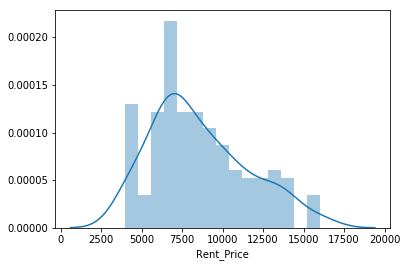

In [54]:
import seaborn as sns
sns.distplot(mh_rent_latlong['Rent_Price'],bins=15)

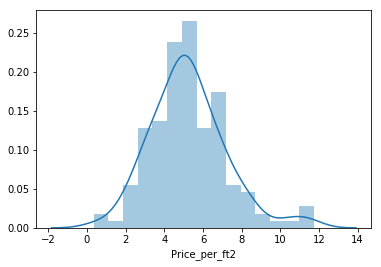

In [55]:
sns.distplot(mh_rent_latlong['Price_per_ft2'],bins=15)

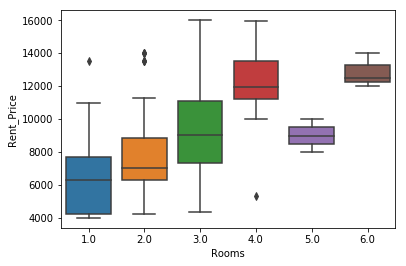

In [56]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mh_rent_latlong)

### Map of Manhattan Apartments for Rent
**The popups shows the address and the monthly price for rent which makes it convenient for us to select the perfect appartment with the price requirement**

In [58]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(mh_rent_latlong['Lat'], mh_rent_latlong['Long'],'$ ' + mh_rent_latlong['Rent_Price'].astype(str)+ ',  '+ mh_rent_latlong['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    

map_manhattan_rent

### Map of Manhattan showing the places for rent and the cluster of venues
**So now we can point to a rental place for price and address location information while knowing the cluster venues around it.
This is an insightful way to explore rental possibilites.**

In [59]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mh_merged['Latitude'], mh_merged['Longitude'], mh_merged['Neighborhood'], mh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mh_rent_latlong['Lat'], mh_rent_latlong['Long'],'$ ' + mh_rent_latlong['Rent_Price'].astype(str)+ mh_rent_latlong['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_clusters2

### Now let's explore a particular rental place and its venues in detail
**In the map above, observation of appartments with rental place below 7000/month is pretty straightforwad while knowing the venues around it.
We could find an appartment with at the right price and in a location with good venues. The next step is to see if it is located near a subway metro station.**

In [61]:
## kk is the cluster number to explore
kk = 3
mh_merged.loc[mh_merged['Cluster Labels'] == kk, mh_merged.columns[[1] + list(range(5, mh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


### Mapping Manhattan Subway Locations
**Manhattan subway metro locations was obtained from sites such as Wikipedia, Google and NY Metro Transit. To simplify, we created a csv file that we can use from the data obtained for the sites mentioned.**

**The geodata will be obtain via Nominatim using the algorythm below.**

In [62]:

body = client_3258318c98374e0390d2a162f2c12e66.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-c9q61ulbzgisc4',Key='NYC_subway_list.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mh_sub= pd.read_csv(body)
mh_sub.head()


,sub_station,sub_address
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA"
1,57 Street Subway Station,"New York, NY 10106, USA"
2,Broad St,"New York, NY 10005, USA"
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA"
4,5 Av and 53 St,"New York, NY 10022, USA"


**Let's add colums labeled 'lat' and 'long' to be filled with geodata**

In [64]:
#  Let's fill columns 'lat'  and 'long'with random temporary numbers just to get started
sLength = len(mh_sub['sub_station'])
lat = pd.Series(np.random.randn(sLength))
long=pd.Series(np.random.randn(sLength))
mh_sub = mh_sub.assign(lat=lat.values)
mh_sub = mh_sub.assign(long=long.values)

### Algorithm to find latitude and longitud for each subway metro station and add them to dataframe
**We created another csv file for this just to simplify the process as it takes a while to run.**

Here's the code cfor reference: 

for n in range(len(mh)): address= mh['sub_address'][n] geolocator = Nominatim() location = geolocator.geocode(address) latitude = location.latitude longitude = location.longitude mh['lat'][n]=latitude mh['long'][n]=longitude

#print(n,latitude,longitude)
time.sleep(2)

print('Geodata completed')

save dataframe to csv file
mh.to_csv('MH_subway.csv',index=False) mh.shape

**We'll read created csv on the next cell.**

In [65]:

body = client_3258318c98374e0390d2a162f2c12e66.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-c9q61ulbzgisc4',Key='MH_subway.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

MH_subway = pd.read_csv(body)
MH_subway.head()


,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


In [66]:
# let's duplicate rows and creating new set mhsub1
mhsub1=MH_subway.drop_duplicates(subset=['lat','long'], keep="last").reset_index(drop=True)
mhsub1.shape

(22, 4)

In [67]:
mhsub1.tail()

,sub_station,sub_address,lat,long
17,190 Street Subway Station,"Bennett Ave, New York, NY 10040, USA",40.858113,-73.932983
18,59 St-Lexington Av Station,"E 60th St, New York, NY 10065, USA",40.762259,-73.966271
19,57 Street Station,"New York, NY 10019, United States",40.764250,-73.954525
20,14 Street / 8 Av,"New York, NY 10014, United States",40.730862,-73.987156
21,MTA New York City,"525 11th Ave, New York, NY 10018, USA",40.759809,-73.999282


### Map of Manhattan showing the location of subway stations

In [69]:
# map subway stations 
# create map of Manhattan using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude=40.7308619
longitude=-73.9871558

map_mhsub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mhsub1) 
map_mhsub1

### Map of Manhattan showing places for rent and the subway locations nearby
**So now, we can visualize the perfect apartments and their nearest subway station. Popups show rental address and monthly rental price and the subway station name.**

***Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a rental place to an specific subway station.***

In [70]:
mh_rent_latlong.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [72]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent_latlong['Lat'], mh_rent_latlong['Long'],'$ ' + mh_rent_latlong['Rent_Price'].astype(str)+ mh_rent_latlong['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_manhattan_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_manhattan_rent

## 4. Results
### MANHATTAN CONSOLIDATED MAP
**Now we'ready to consolidate all the required inforamtion to make the apartment selection in one map**
- Map of Manhattan with rental places, subway locations and cluster of venues
- Red dots are Subway stations, Blue dots are apartments available for rent, Bubbles are the clusters of venues

In [73]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent_latlong['Lat'], mh_rent_latlong['Long'],'$ ' + mh_rent_latlong['Rent_Price'].astype(str)+ ', '+mh_rent_latlong['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mh_merged['Latitude'], mh_merged['Longitude'], mh_merged['Neighborhood'], mh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_one)

map_mh_one

### Problem Resolution - Apartment Selection
**After studying the consolidated map above, we have 2 locations that meet our set requirements. We'll take a closer look at these two locations so we can make a better choice.**
- Option 1: 305 East 63rd Street in the Sutton Place Neighborhood and near 'subway 59th Street' station, Cluster # 2 Monthly rent : 7500 Dollars
- Option 2: 19 Dutch Street in the Financial District Neighborhood and near 'Fulton Street Subway' station, Cluster # 3 Monthly rent : 6935 Dollars

**Venues for Option 1 - Cluster 2**

In [74]:
kk = 2
mh_merged.loc[mh_merged['Cluster Labels'] == kk, mh_merged.columns[[1] + list(range(5, mh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


**Venues for Option 2 - Cluster 3**

In [76]:
kk = 3
mh_merged.loc[mh_merged['Cluster Labels'] == kk, mh_merged.columns[[1] + list(range(5, mh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


### Apartment Selection

Using the consolidated map, I was able to explore all possibilities as the popups provide the information needed for the best decision.

**Apartment 1:**
 - Rent:  7500USD
 - Located 400 meters from subway station at 59th Street
 - Venues for this apt are shown above in Cluster 2 and it is located in a fine district in the East side of Manhattan

**Apartment 2:**
 - Rent: 6935USD
 - Located 60 meters from subway station at Fulton Street
 - Venues for this apt are shown above in Cluster 3
 

## 5. Discussion
### Apartment 2 falls within our rent budget and is closer to a subway station than Apartment 1. Also, Apartment 2 is in Cluster 3, which closely resembles the current neighborhood in Singapore.

## 6. Conclusion

### Based on our observation and analysis. We are choosing Apartment #2 as it meets all the requirements we have set in the beginning:
- 19 Dutch Street in the Financial District Neighborhood
- near 'Fulton Street Subway' station
- fantastic neighborhood venues - Cluster # 3 
- Monthly rent : 6935 Dollars

### ---- End of Project --- ###